In [1]:
from load_EEGs_improved import EEGDataset

In [2]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("./forward_model/")
import stacklineplot
from pylab import rcParams
import h5py
rcParams['figure.figsize'] = 20, 10 * 5
import random

In [3]:
# data_file = "/mnt/data1/eegdbs/eegdata_summary-2017-10-26.csv"
data_file = None
num_channels = 19
real_eegs = EEGDataset("/mnt/data1/eegdbs/SEC-0.1/stanford/", csv_file=data_file, num_examples=64 * 1, num_channels=44,
                       length=1004, delay=10000)

Number of files found: 65 Length: 1004


In [4]:
real_eegs.shuffle()
real_eegs[0][0].numpy().shape

(1004, 44)

In [5]:
index = 6

In [6]:
sample = real_eegs[0][index].numpy()

In [17]:
sample.shape
rcParams['figure.figsize'] = 3, 10

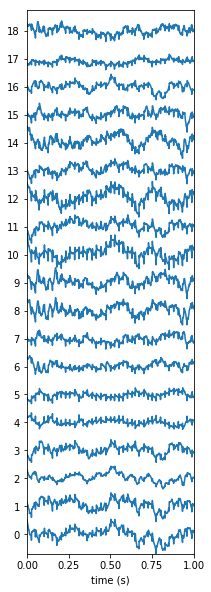

In [20]:
real_eegs.shuffle()
sample = real_eegs[0][index].numpy()
stacklineplot.stackplot(sample.T[:num_channels], seconds=1004/1000, ylabels=list(range(num_channels)), yscale=1)

### Load an EEG

In [18]:
from load_EEGs_improved import get_filenames

In [57]:
filenames = get_filenames("/mnt/data1/eegdbs/SEC-0.1/stanford/", 44, 786, min_length=100, max_length=999999, max_num=50)

In [58]:
filename = "/mnt/home2/dlongo/eegML/eeg-hdfstorage/data/spasms.eeghdf"

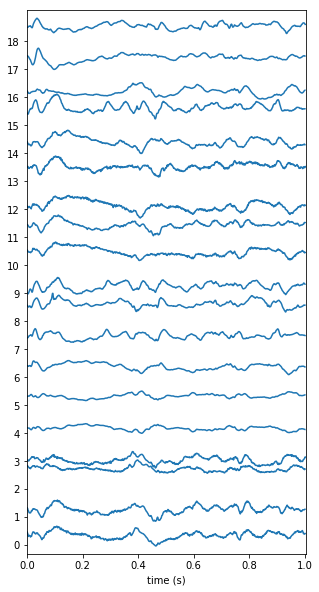

In [69]:
filename = filenames[random.randint(0,50)]
# filename = filenames[5]
# hdf = h5py.File(filename, "r")
rec = hdf["record-0"]
signals = rec["signals"][:, 10000 : 10000 + 786]
rcParams['figure.figsize'] = 5, 10
signals = normalize(signals)
num_channels = 19
stacklineplot.stackplot(signals[:num_channels], seconds=1004/1000, ylabels=list(range(num_channels)), yscale=1)

### Vizualize with Fast Fourier Transform

In [40]:
from scipy import signal

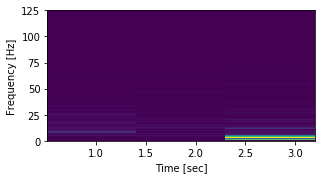

In [45]:
f, t, Sxx = signal.spectrogram(sample.T[:][13], fs=250)#,
#                                       nperseg=1004)#,
#                                       detrend=False, scaling='spectrum')
plt.subplots(figsize=(4.8, 2.4))
plt.pcolormesh(t, f, Sxx, cmap='viridis')
# ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()